# Data Exploratory and Visualization

@author: Mike Yuan, Shayne Andrew

Date: April 2019

About: This file is meant to read the raw csv, perform EDA and basic data cleaning



## Load Library and helper functions


In [1]:
# import library
library(tidyverse)
library(ggplot2)
library(stringr)



── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.2.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


In [2]:
# helper functions

to_bool <- function(x) {ifelse(x == 'True', TRUE, FALSE)}



## Define global varible for binwidth when plotting histogram


In [3]:
# set global variables

BIN_WIDTH = 2.0
PREPATH = '../'


## Reading and preparing the data dataframe
**IMPORTANT!!!** Depend on where you run the file, assigned `"../"` to `PREPATH` above. Otherwise, keep it `''` if you are running from project's `root` directory

In [4]:
# read csv
raw_df <- read.csv(paste(PREPATH, 'data/mds-retention_2019-04-04.csv', sep="" ),
  stringsAsFactors = FALSE)

# load answer keys

answer_key <- read.csv(paste(PREPATH, 'data/answer_key.csv', sep="" ),
  stringsAsFactors = FALSE)


In [5]:
# data cleaning
# remove second row as irrlevant
raw_df <- raw_df[-2,]

# get only the questions
raw_df <- raw_df %>% select(matches("Q[0-9]"))
questions <- unname(unlist(raw_df[1,]))

# removed unwanted row and enforce questions as columns
raw_df <- raw_df[-1,]
names(raw_df) <- questions

#  get deciding factors
d_factors <- raw_df[,1:5]

# convert character to numeric for hours
d_factors[,2:5] <- sapply( d_factors[,2:5], as.numeric )

retentions <- raw_df[,6:ncol(raw_df)]
# convert character to bool for retention question
retentions <- retentions %>%
  mutate_all(to_bool)

# enforce the questions in answer_key and dataframe matche
answer_key$questions <- colnames(retentions)



In [6]:
# save clean data
clean_df <- d_factors %>%
  cbind(retentions)


cat(sprintf("\n========>saving clean data to result\n\n"))
write.csv(clean_df , file = paste(PREPATH, 'result/clean_data_long.csv', sep=""))

# showing the head of the clean data for Rmd
head(clean_df)



========>saving clean data to result



,Which MDS cohort do you belong to?,"On average during MDS, how many lectures do you attend per week? - Average Lectures (per week)","On average during MDS, how many labs do you attend per week? - Average Labs (per week)","On average during MDS, how many hours of sleep did you get per week? - Average Hours (per week)","On average during MDS, how many hours of studying (outside lectures & labs) did you do per week? - Average Hours (per week)",Non-zero correlation implies non-zero co-variance.,Recall= TP/(TP + FP),"For a decision tree algorithm the threshold value for splitting features at each node, is a hyper-parameter.","L1 regularisation gives sparsity, but L2 does not.",For the function (4 log n +16n ) has asymptotic running time slower than linear time O(n).,Increasing MCMC sample size makes the point estimate closer to the true parameter value.
3,2018 -19,8,4,70.2,19.10,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
4,2018 -19,8,4,50.9,29.76,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
5,2018 -19,8,4,50.0,10.00,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE
6,2018 -19,8,4,50.0,20.16,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
7,2018 -19,8,4,35.5,30.70,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
8,2018 -19,8,4,40.1,20.03,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE


### Preparing clean data for data analysis
The goal here is to create a clean dataset with shorter header and score for each question
Also, include the average score


In [7]:
# prepare for clean data with short handing for data anaysis
clean_data_short <- clean_df

# d for deciding factors
# r for retention questions
# s for score for each retention question
colnames(clean_data_short) <- c('d1', 'd2', 'd3', 'd4', 'd5',
                                'r1', 'r2', 'r3', 'r4', 'r5', 'r6')
clean_data_short <- clean_data_short %>%
  mutate(s1 = (r1 == TRUE),
         s2 = (r2 == FALSE),
         s3 = (r3 == FALSE),
         s4 = (r4 == TRUE),
         s5 = (r5 == FALSE),
         s6 = (r6 == FALSE)) %>%
  mutate(average = (s1 + s2 + s3 + s4 + s5 + s6)/6)

cat(sprintf("\n========>saving clean data with short header and scores\n\n"))
write.csv(clean_data_short , file = paste(PREPATH, 'result/clean_data_short.csv', sep=""))




========>saving clean data with short header and scores



In [8]:
# make plot for deciding factors
cat(sprintf("\n========> saving deciding factor plots\n\n"))
discrete_d_factor_plt <- d_factors[,c(-4,-5)] %>%
  gather(key="questions", value="answers") %>%
  ggplot(aes(x = answers)) +
  geom_bar( stat = 'count') +
  facet_wrap(~questions,scales = "free", ncol=1)

ggsave(filename="discrete_deciding_factors.png",
  plot=discrete_d_factor_plt,
  path= paste(PREPATH, 'img', sep=""))


continuous_d_factors_hist <- d_factors[,c(4,5)] %>%
    gather(key="questions", value="answers") %>%
    ggplot(aes(x = answers)) +
    geom_histogram(binwidth=BIN_WIDTH) +
    facet_wrap(~questions,scales = "free", ncol=1)

ggsave(filename="continuous_deciding_factors_hist.png",
  plot=continuous_d_factors_hist,
  path= paste(PREPATH, 'img', sep=""))


continuous_d_factors_preq <- d_factors[,c(4,5)] %>%
    gather(key="questions", value="answers") %>%
    ggplot(aes(x = answers)) +
    geom_freqpoly(binwidth=BIN_WIDTH) +
    facet_wrap(~questions,scales = "free", ncol=1)

ggsave(filename="continuous_deciding_factors_freqp.png",
  plot=continuous_d_factors_preq,
  path= paste(PREPATH, 'img', sep=""))



========> saving deciding factor plots



Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


Show deciding factor plots


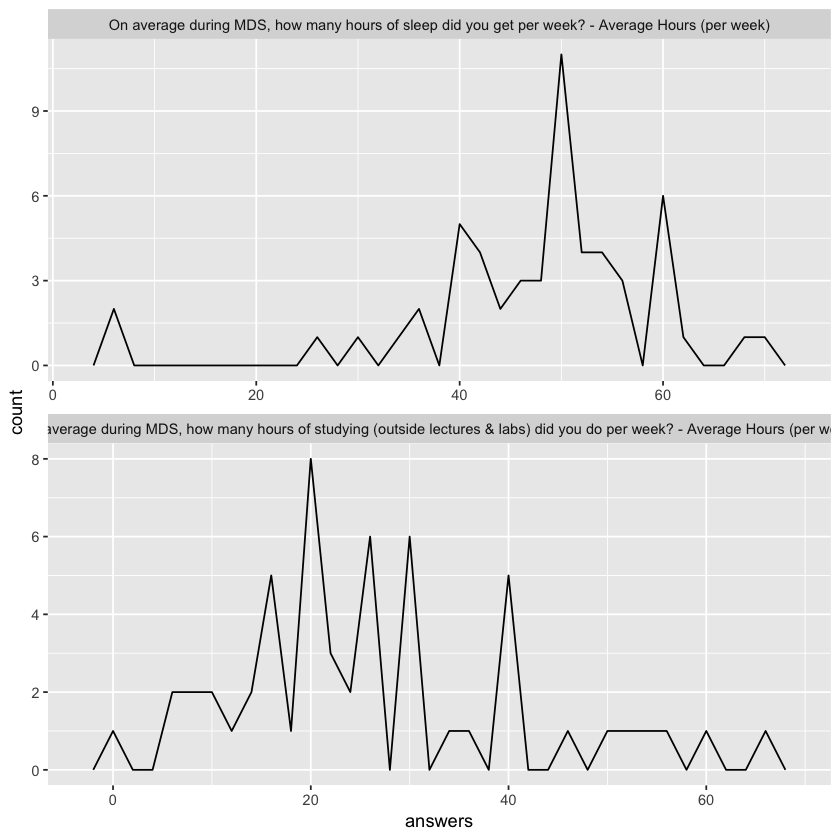

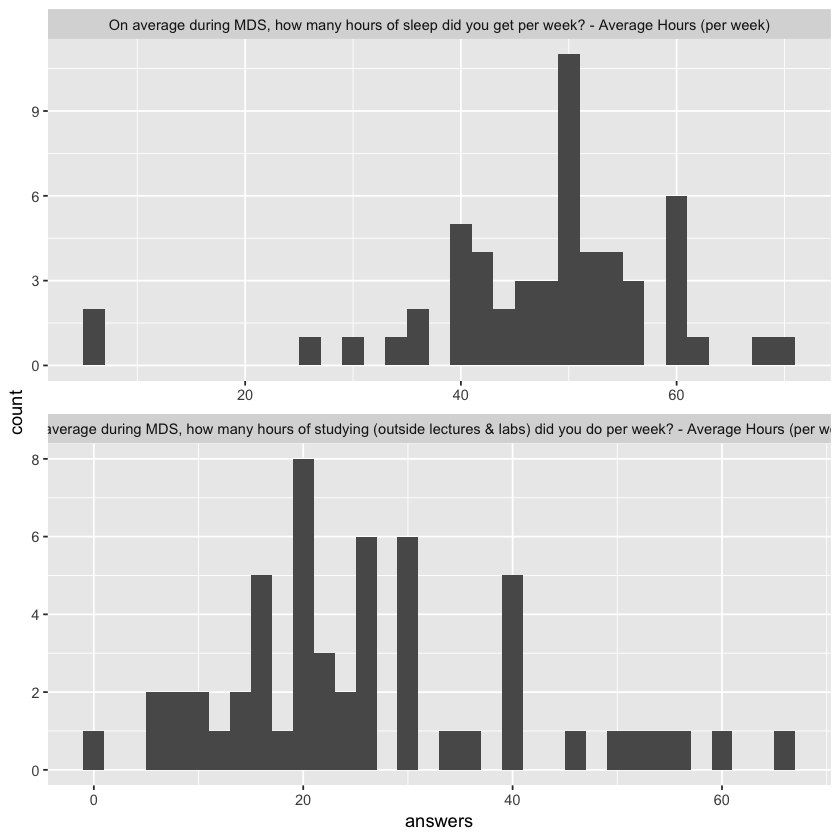

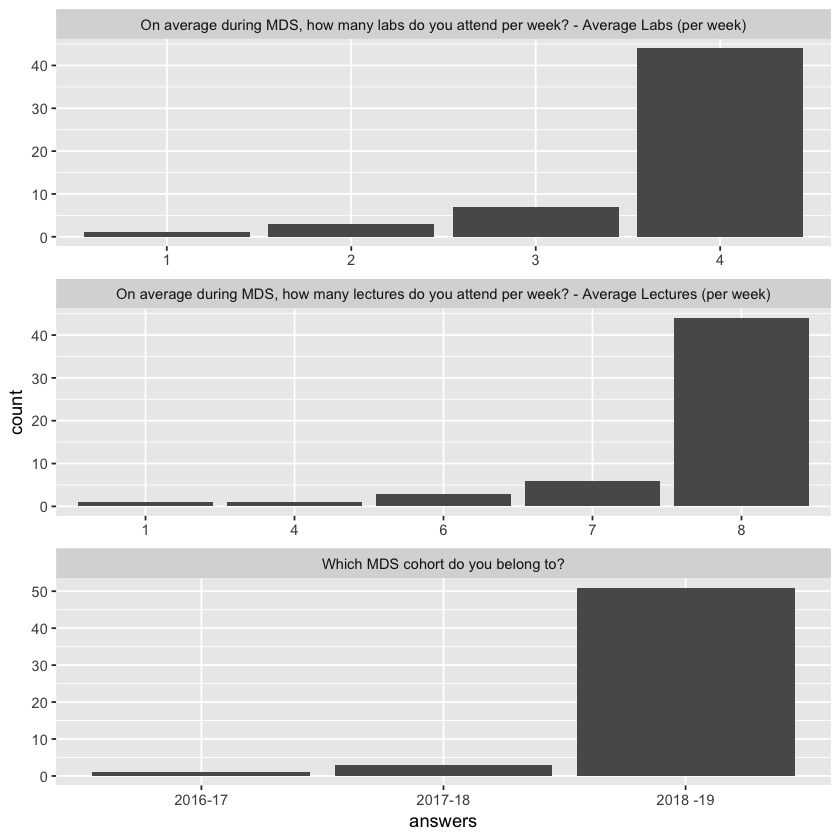

In [9]:
# show continous
continuous_d_factors_preq
continuous_d_factors_hist
discrete_d_factor_plt


In [10]:
# plot the retention questions


retentions <- sapply( retentions, as.character )

# preparing the dataframe to get the correctness of each answer
retentions <- as.data.frame(retentions) %>%
    gather(key="questions", value="answers") %>%
    left_join(answer_key, by='questions') %>%
    mutate(correct = (answers == answer_key))


retentions_plot <- retentions %>%
  mutate(questions = str_wrap(questions, width =  25)) %>%
  ggplot(aes(x = answers, fill = correct)) +
  geom_bar(stat="count") +
  facet_wrap(~questions,scales = "free", ncol=3)

cat(sprintf("\n========> saving retention question plots\n\n"))
ggsave(filename="retentions.png",
  plot=retentions_plot,
  path= paste(PREPATH, 'img', sep=""))



========> saving retention question plots



Saving 7 x 7 in image


show renteion plot

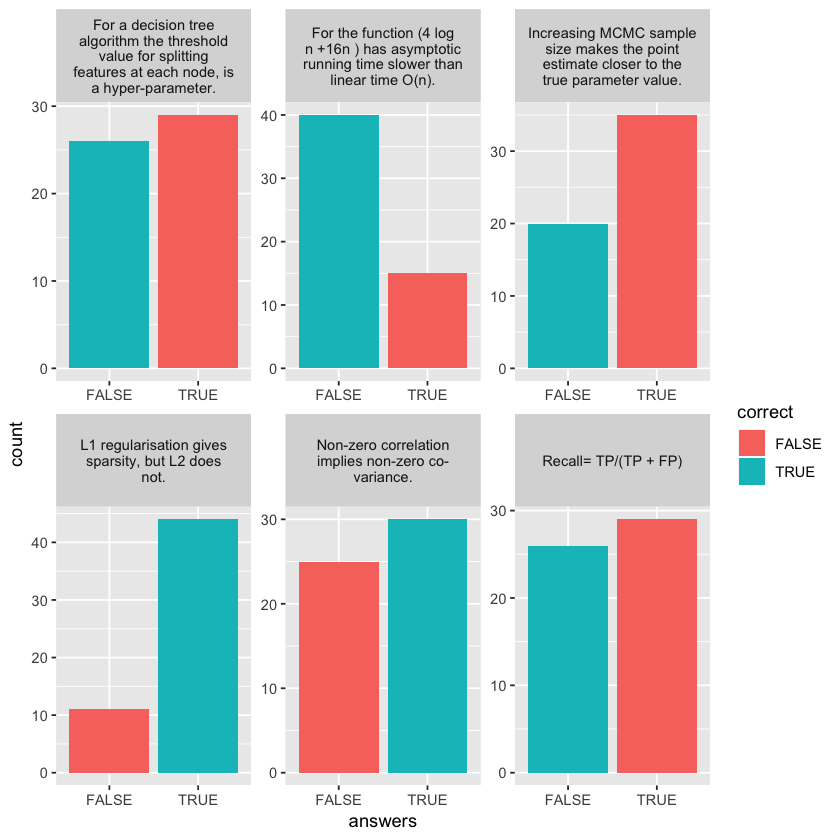

In [11]:
# show retention plot
retentions_plot


show distribution of the average scores

In [12]:
score_distribution_plot <- clean_data_short %>%
  ggplot(aes(x = average)) +
  geom_density( fill ='lightblue') +
  labs(title='Distribution of average scores',
       x='Overall average out of 6 questions',
       y = 'Score distribution')


cat(sprintf("\n========> saving score average distribution plot\n\n"))
ggsave(filename="score_average.png",
  plot=score_distribution_plot,
  path= paste(PREPATH, 'img', sep=""))

# save historgram
score_hist_plot <- clean_data_short %>%
  ggplot(aes(x = average)) +
  geom_histogram(bins=6) +
  labs(title='Distribution of average scores',
       x='Overall average out of 6 questions',
       y = 'Score distribution')


cat(sprintf("\n========> saving score average histogram plot\n\n"))
ggsave(filename="score_average_hist.png",
  plot=score_hist_plot,
  path= paste(PREPATH, 'img', sep=""))




========> saving score average distribution plot



Saving 7 x 7 in image



========> saving score average histogram plot



Saving 7 x 7 in image


Show score average plots


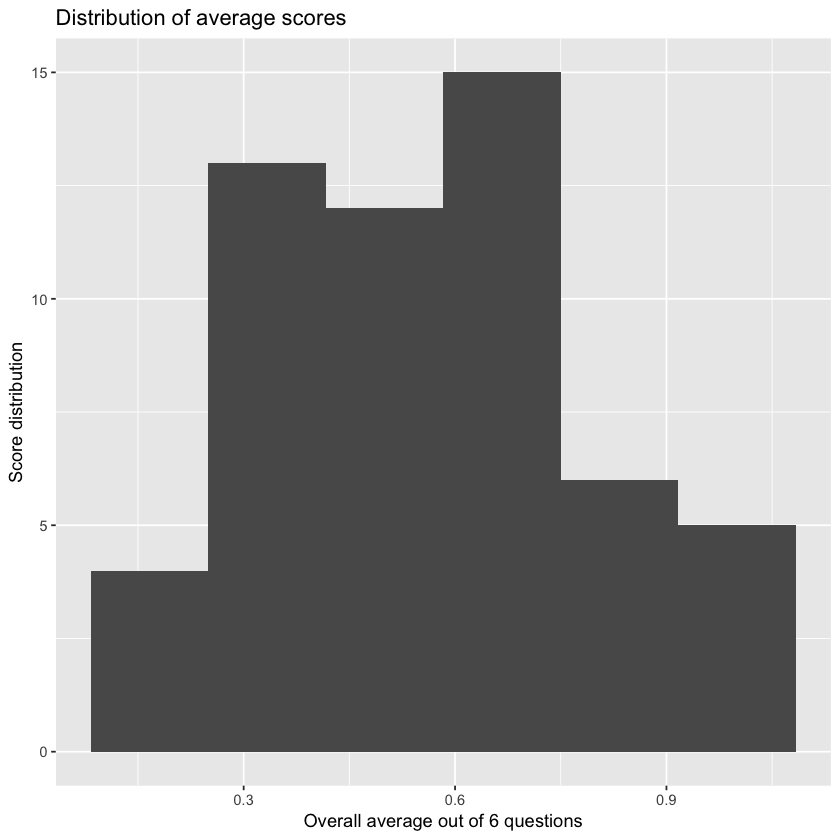

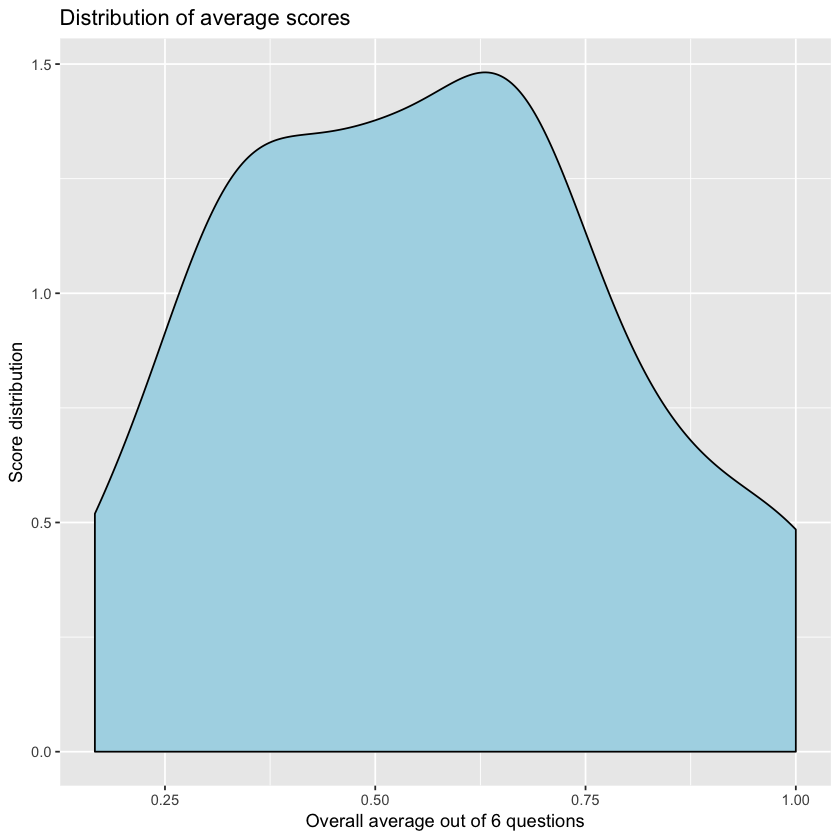

In [13]:
score_hist_plot
score_distribution_plot

In [14]:
data <- read.csv(paste(PREPATH, 'result/clean_data_short.csv', sep="" ),
  stringsAsFactors = FALSE)

# if you prefer the long question header
colnames(data)[2:12] <- questions 

summary_df <- data.frame(unclass(summary(data)), check.names = FALSE, stringsAsFactors = FALSE)
summary_df

,X,Which MDS cohort do you belong to?,"On average during MDS, how many lectures do you attend per week? - Average Lectures (per week)","On average during MDS, how many labs do you attend per week? - Average Labs (per week)","On average during MDS, how many hours of sleep did you get per week? - Average Hours (per week)","On average during MDS, how many hours of studying (outside lectures & labs) did you do per week? - Average Hours (per week)",Non-zero correlation implies non-zero co-variance.,Recall= TP/(TP + FP),"For a decision tree algorithm the threshold value for splitting features at each node, is a hyper-parameter.","L1 regularisation gives sparsity, but L2 does not.",For the function (4 log n +16n ) has asymptotic running time slower than linear time O(n).,Increasing MCMC sample size makes the point estimate closer to the true parameter value.,s1,s2,s3,s4,s5,s6,average
X,Min. : 1.0,Length:55,Min. :1.000,Min. :1.000,Min. : 5.20,Min. : 0.00,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Mode :logical,Min. :0.1667
X.1,1st Qu.:14.5,Class :character,1st Qu.:8.000,1st Qu.:4.000,1st Qu.:42.25,1st Qu.:16.21,FALSE:25,FALSE:26,FALSE:26,FALSE:11,FALSE:40,FALSE:20,FALSE:25,FALSE:29,FALSE:29,FALSE:11,FALSE:15,FALSE:35,1st Qu.:0.3333
X.2,Median :28.0,Mode :character,Median :8.000,Median :4.000,Median :50.00,Median :24.08,TRUE :30,TRUE :29,TRUE :29,TRUE :44,TRUE :15,TRUE :35,TRUE :30,TRUE :26,TRUE :26,TRUE :44,TRUE :40,TRUE :20,Median :0.5000
X.3,Mean :28.0,NA,Mean :7.582,Mean :3.709,Mean :47.67,Mean :26.24,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Mean :0.5636
X.4,3rd Qu.:41.5,NA,3rd Qu.:8.000,3rd Qu.:4.000,3rd Qu.:54.40,3rd Qu.:31.90,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3rd Qu.:0.6667
X.5,Max. :55.0,NA,Max. :8.000,Max. :4.000,Max. :70.20,Max. :65.63,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Max. :1.0000
